# 学習に関するテクニック
## パラメータの更新
### SGD

In [1]:
class SGD:
    """確率的勾配降下法（Stochastic Gradient Descent）"""
    def __init__(self, lr=0.01):
        self.lr = lr
        
    def update(self, params, grads):
        for key in params.keys():
            params[key] -= self.lr * grads[key] 

### Momentum SGD

In [2]:
class Momentum:
    """Momentum SGD"""
    def __init__(self, lr=0.01, momentum=0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None
        
    def update(self, params, grads):
        if self.v is None:
            self.v = {}
            for key, val in params.items():                                
                self.v[key] = np.zeros_like(val)
                
        for key in params.keys():
            self.v[key] = self.momentum*self.v[key] - self.lr*grads[key] 
            params[key] += self.v[key]

### AdaGrad

In [3]:
class AdaGrad:
    """AdaGrad"""
    def __init__(self, lr=0.01):
        self.lr = lr
        self.h = None
        
    def update(self, params, grads):
        if self.h is None:
            self.h = {}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)
            
        for key in params.keys():
            self.h[key] += grads[key] * grads[key]
            params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + 1e-7)

### Adam

In [4]:
class Adam:

    """Adam (http://arxiv.org/abs/1412.6980v8)"""

    def __init__(self, lr=0.001, beta1=0.9, beta2=0.999):
        self.lr = lr
        self.beta1 = beta1
        self.beta2 = beta2
        self.iter = 0
        self.m = None
        self.v = None
        
    def update(self, params, grads):
        if self.m is None:
            self.m, self.v = {}, {}
            for key, val in params.items():
                self.m[key] = np.zeros_like(val)
                self.v[key] = np.zeros_like(val)
        
        self.iter += 1
        lr_t  = self.lr * np.sqrt(1.0 - self.beta2**self.iter) / (1.0 - self.beta1**self.iter)         
        
        for key in params.keys():
            #self.m[key] = self.beta1*self.m[key] + (1-self.beta1)*grads[key]
            #self.v[key] = self.beta2*self.v[key] + (1-self.beta2)*(grads[key]**2)
            self.m[key] += (1 - self.beta1) * (grads[key] - self.m[key])
            self.v[key] += (1 - self.beta2) * (grads[key]**2 - self.v[key])
            
            params[key] -= lr_t * self.m[key] / (np.sqrt(self.v[key]) + 1e-7)
            
            #unbias_m += (1 - self.beta1) * (grads[key] - self.m[key]) # correct bias
            #unbisa_b += (1 - self.beta2) * (grads[key]*grads[key] - self.v[key]) # correct bias
            #params[key] += self.lr * unbias_m / (np.sqrt(unbisa_b) + 1e-7)

### どの更新手法を用いるか？

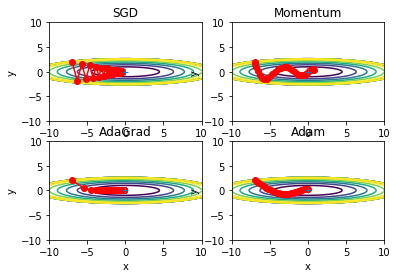

In [12]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict
from mymodule.optimizer import *


def f(x, y):
    return x**2 / 20.0 + y**2


def df(x, y):
    return x / 10.0, 2.0*y

init_pos = (-7.0, 2.0)
params = {}
params['x'], params['y'] = init_pos[0], init_pos[1]
grads = {}
grads['x'], grads['y'] = 0, 0


optimizers = OrderedDict()
optimizers["SGD"] = SGD(lr=0.95)
optimizers["Momentum"] = Momentum(lr=0.1)
optimizers["AdaGrad"] = AdaGrad(lr=1.5)
optimizers["Adam"] = Adam(lr=0.3)

idx = 1

for key in optimizers:
    optimizer = optimizers[key]
    x_history = []
    y_history = []
    params['x'], params['y'] = init_pos[0], init_pos[1]
    
    for i in range(30):
        x_history.append(params['x'])
        y_history.append(params['y'])
        
        grads['x'], grads['y'] = df(params['x'], params['y'])
        optimizer.update(params, grads)
    

    x = np.arange(-10, 10, 0.01)
    y = np.arange(-5, 5, 0.01)
    
    X, Y = np.meshgrid(x, y) 
    Z = f(X, Y)
    
    # for simple contour line  
    mask = Z > 7
    Z[mask] = 0
    
    # plot 
    plt.subplot(2, 2, idx)
    idx += 1
    plt.plot(x_history, y_history, 'o-', color="red")
    plt.contour(X, Y, Z)
    plt.ylim(-10, 10)
    plt.xlim(-10, 10)
    plt.plot(0, 0, '+')
    #colorbar()
    #spring()
    plt.title(key)
    plt.xlabel("x")
    plt.ylabel("y")
    
plt.show()

### MNISTデータセットによる更新手法の比較

===========iteration:0===========
SGD:2.40225910575
Momentum:2.41580422681
AdaGrad:2.39312630274
Adam:2.19731125426
===========iteration:100===========
SGD:1.37376098071
Momentum:0.27410448419
AdaGrad:0.142416757381
Adam:0.183610401916
===========iteration:200===========
SGD:0.753106446027
Momentum:0.251182077721
AdaGrad:0.121018959559
Adam:0.227491694796
===========iteration:300===========
SGD:0.629981092284
Momentum:0.196821457748
AdaGrad:0.114666114725
Adam:0.15393750382
===========iteration:400===========
SGD:0.501177576591
Momentum:0.185945587912
AdaGrad:0.104330109484
Adam:0.154360002086
===========iteration:500===========
SGD:0.21607096344
Momentum:0.132611399691
AdaGrad:0.0620986140556
Adam:0.0807253592018
===========iteration:600===========
SGD:0.356706647519
Momentum:0.203893760156
AdaGrad:0.0649340405429
Adam:0.11365762562
===========iteration:700===========
SGD:0.362716058074
Momentum:0.128673376587
AdaGrad:0.0634305771001
Adam:0.0915185599233
===========iteration:800======

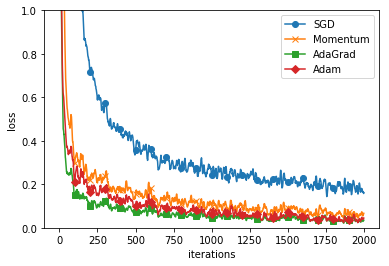

In [11]:
# coding: utf-8
import os
import sys
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import matplotlib.pyplot as plt
from mymodule.mnist import load_mnist
from mymodule.util import smooth_curve
from mymodule.multi_layer_net import MultiLayerNet
from mymodule.optimizer import *


# 0:MNISTデータの読み込み==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1:実験の設定==========
optimizers = {}
optimizers['SGD'] = SGD()
optimizers['Momentum'] = Momentum()
optimizers['AdaGrad'] = AdaGrad()
optimizers['Adam'] = Adam()
#optimizers['RMSprop'] = RMSprop()

networks = {}
train_loss = {}
for key in optimizers.keys():
    networks[key] = MultiLayerNet(
        input_size=784, hidden_size_list=[100, 100, 100, 100],
        output_size=10)
    train_loss[key] = []    


# 2:訓練の開始==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in optimizers.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizers[key].update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print( "===========" + "iteration:" + str(i) + "===========")
        for key in optimizers.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


# 3.グラフの描画==========
markers = {"SGD": "o", "Momentum": "x", "AdaGrad": "s", "Adam": "D"}
x = np.arange(max_iterations)
for key in optimizers.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 1)
plt.legend()
plt.show()

### 隠れ層のアクティベーション分布

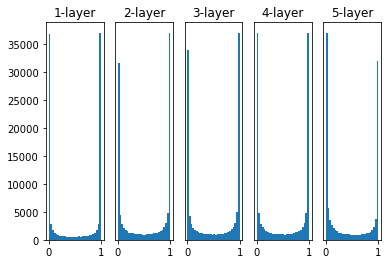

In [15]:
# coding: utf-8
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def ReLU(x):
    return np.maximum(0, x)


def tanh(x):
    return np.tanh(x)
    
input_data = np.random.randn(1000, 100)  # 1000個のデータ
node_num = 100  # 各隠れ層のノード（ニューロン）の数
hidden_layer_size = 5  # 隠れ層が5層
activations = {}  # ここにアクティベーションの結果を格納する

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    # 初期値の値をいろいろ変えて実験しよう！
    w = np.random.randn(node_num, node_num) * 1
    # w = np.random.randn(node_num, node_num) * 0.01
    # w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
    # w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)


    a = np.dot(x, w)


    # 活性化関数の種類も変えて実験しよう！
    z = sigmoid(a)
    # z = ReLU(a)
    # z = tanh(a)

    activations[i] = z

# ヒストグラムを描画
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

### MNISTデータセットによる重み初期値の比較

===========iteration:0===========
std=0.01:2.30248349887
Xavier:2.29412712969
He:2.36634217392
===========iteration:100===========
std=0.01:2.30177489055
Xavier:2.2427420355
He:1.39939048808
===========iteration:200===========
std=0.01:2.30257775919
Xavier:2.13776884754
He:0.635810217135
===========iteration:300===========
std=0.01:2.30098355476
Xavier:1.80989429224
He:0.534498127363
===========iteration:400===========
std=0.01:2.30278872171
Xavier:1.44811694896
He:0.605065569095
===========iteration:500===========
std=0.01:2.30248403392
Xavier:0.910493642375
He:0.406290660893
===========iteration:600===========
std=0.01:2.30229443072
Xavier:0.659796355267
He:0.296860213411
===========iteration:700===========
std=0.01:2.30314094284
Xavier:0.591913876238
He:0.309555740544
===========iteration:800===========
std=0.01:2.30673749384
Xavier:0.629057484109
He:0.385536275217
===========iteration:900===========
std=0.01:2.30710914335
Xavier:0.498827922932
He:0.252115451872
===========iteration

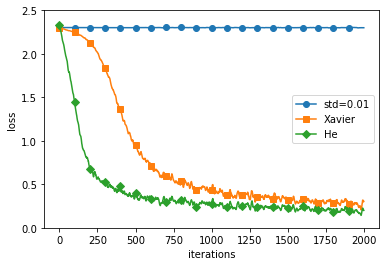

In [16]:
# coding: utf-8
import os
import sys

sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from mymodule.mnist import load_mnist
from mymodule.util import smooth_curve
from mymodule.multi_layer_net import MultiLayerNet
from mymodule.optimizer import SGD


# 0:MNISTデータの読み込み==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1:実験の設定==========
weight_init_types = {'std=0.01': 0.01, 'Xavier': 'sigmoid', 'He': 'relu'}
optimizer = SGD(lr=0.01)

networks = {}
train_loss = {}
for key, weight_type in weight_init_types.items():
    networks[key] = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100],
                                  output_size=10, weight_init_std=weight_type)
    train_loss[key] = []


# 2:訓練の開始==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in weight_init_types.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizer.update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print("===========" + "iteration:" + str(i) + "===========")
        for key in weight_init_types.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


# 3.グラフの描画==========
markers = {'std=0.01': 'o', 'Xavier': 's', 'He': 'D'}
x = np.arange(max_iterations)
for key in weight_init_types.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 2.5)
plt.legend()
plt.show()

### Batch Normalization

============== 1/16 ==============
epoch:0 | 0.093 - 0.092


/Users/kot/ipython_notebook/DeepLearning/mymodule/functions.py:56: RuntimeWarning: divide by zero encountered in log
  return -np.sum(np.log(y[np.arange(batch_size), t])) / batch_size
/Users/kot/ipython_notebook/DeepLearning/mymodule/functions.py:34: RuntimeWarning: invalid value encountered in subtract
  x = x - np.max(x, axis=0)
/Users/kot/ipython_notebook/DeepLearning/mymodule/layers.py:12: RuntimeWarning: invalid value encountered in less_equal
  self.mask = (x <= 0)


epoch:1 | 0.097 - 0.099
epoch:2 | 0.097 - 0.117
epoch:3 | 0.097 - 0.124
epoch:4 | 0.097 - 0.149
epoch:5 | 0.097 - 0.176
epoch:6 | 0.097 - 0.183
epoch:7 | 0.097 - 0.202
epoch:8 | 0.097 - 0.227
epoch:9 | 0.097 - 0.238
epoch:10 | 0.097 - 0.259
epoch:11 | 0.097 - 0.281
epoch:12 | 0.097 - 0.292
epoch:13 | 0.097 - 0.313
epoch:14 | 0.097 - 0.33
epoch:15 | 0.097 - 0.353
epoch:16 | 0.097 - 0.367
epoch:17 | 0.097 - 0.379
epoch:18 | 0.097 - 0.39
epoch:19 | 0.097 - 0.399
============== 2/16 ==============
epoch:0 | 0.117 - 0.119


/Users/kot/miniconda2/envs/python3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "
/Users/kot/ipython_notebook/DeepLearning/mymodule/multi_layer_net_extend.py:101: RuntimeWarning: overflow encountered in square
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)
/Users/kot/ipython_notebook/DeepLearning/mymodule/multi_layer_net_extend.py:101: RuntimeWarning: invalid value encountered in double_scalars
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)


epoch:1 | 0.097 - 0.113
epoch:2 | 0.097 - 0.109
epoch:3 | 0.097 - 0.125
epoch:4 | 0.097 - 0.149
epoch:5 | 0.097 - 0.162
epoch:6 | 0.097 - 0.189
epoch:7 | 0.097 - 0.216
epoch:8 | 0.097 - 0.233
epoch:9 | 0.097 - 0.249
epoch:10 | 0.097 - 0.269
epoch:11 | 0.097 - 0.287
epoch:12 | 0.097 - 0.298
epoch:13 | 0.097 - 0.314
epoch:14 | 0.097 - 0.33
epoch:15 | 0.097 - 0.351
epoch:16 | 0.097 - 0.373
epoch:17 | 0.097 - 0.387
epoch:18 | 0.097 - 0.406
epoch:19 | 0.097 - 0.418
============== 3/16 ==============
epoch:0 | 0.073 - 0.135
epoch:1 | 0.337 - 0.135
epoch:2 | 0.486 - 0.132
epoch:3 | 0.615 - 0.17
epoch:4 | 0.702 - 0.217
epoch:5 | 0.743 - 0.246
epoch:6 | 0.805 - 0.281
epoch:7 | 0.822 - 0.314
epoch:8 | 0.859 - 0.343
epoch:9 | 0.9 - 0.367
epoch:10 | 0.92 - 0.397
epoch:11 | 0.94 - 0.428
epoch:12 | 0.953 - 0.442
epoch:13 | 0.964 - 0.47
epoch:14 | 0.968 - 0.493
epoch:15 | 0.974 - 0.51
epoch:16 | 0.981 - 0.534
epoch:17 | 0.99 - 0.555
epoch:18 | 0.99 - 0.56
epoch:19 | 0.991 - 0.581
============== 4/16 

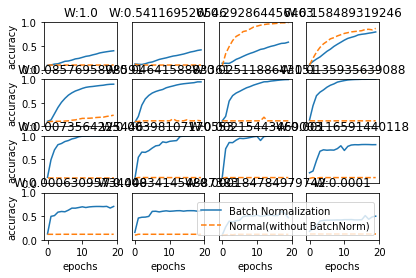

In [6]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mymodule.mnist import load_mnist
from mymodule.multi_layer_net_extend import MultiLayerNetExtend
from mymodule.optimizer import SGD, Adam

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 学習データを削減
x_train = x_train[:1000]
t_train = t_train[:1000]

max_epochs = 20
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01


def __train(weight_init_std):
    bn_network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10, 
                                    weight_init_std=weight_init_std, use_batchnorm=True)
    network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10,
                                weight_init_std=weight_init_std)
    optimizer = SGD(lr=learning_rate)
    
    train_acc_list = []
    bn_train_acc_list = []
    
    iter_per_epoch = max(train_size / batch_size, 1)
    epoch_cnt = 0
    
    for i in range(1000000000):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]
    
        for _network in (bn_network, network):
            grads = _network.gradient(x_batch, t_batch)
            optimizer.update(_network.params, grads)
    
        if i % iter_per_epoch == 0:
            train_acc = network.accuracy(x_train, t_train)
            bn_train_acc = bn_network.accuracy(x_train, t_train)
            train_acc_list.append(train_acc)
            bn_train_acc_list.append(bn_train_acc)
    
            print("epoch:" + str(epoch_cnt) + " | " + str(train_acc) + " - " + str(bn_train_acc))
    
            epoch_cnt += 1
            if epoch_cnt >= max_epochs:
                break
                
    return train_acc_list, bn_train_acc_list


# 3.グラフの描画==========
weight_scale_list = np.logspace(0, -4, num=16)
x = np.arange(max_epochs)

for i, w in enumerate(weight_scale_list):
    print( "============== " + str(i+1) + "/16" + " ==============")
    train_acc_list, bn_train_acc_list = __train(w)
    
    plt.subplot(4,4,i+1)
    plt.title("W:" + str(w))
    if i == 15:
        plt.plot(x, bn_train_acc_list, label='Batch Normalization', markevery=2)
        plt.plot(x, train_acc_list, linestyle = "--", label='Normal(without BatchNorm)', markevery=2)
    else:
        plt.plot(x, bn_train_acc_list, markevery=2)
        plt.plot(x, train_acc_list, linestyle="--", markevery=2)

    plt.ylim(0, 1.0)
    if i % 4:
        plt.yticks([])
    else:
        plt.ylabel("accuracy")
    if i < 12:
        plt.xticks([])
    else:
        plt.xlabel("epochs")
    plt.legend(loc='lower right')
    
plt.show()

## 正則化・過学習

### Weight decay

epoch:0, train acc:0.113333333333, test acc:0.0946
epoch:1, train acc:0.116666666667, test acc:0.0996
epoch:2, train acc:0.156666666667, test acc:0.1061
epoch:3, train acc:0.173333333333, test acc:0.1162
epoch:4, train acc:0.183333333333, test acc:0.1264
epoch:5, train acc:0.203333333333, test acc:0.1403
epoch:6, train acc:0.22, test acc:0.1552
epoch:7, train acc:0.246666666667, test acc:0.1696
epoch:8, train acc:0.273333333333, test acc:0.1817
epoch:9, train acc:0.283333333333, test acc:0.1964
epoch:10, train acc:0.29, test acc:0.2071
epoch:11, train acc:0.306666666667, test acc:0.2169
epoch:12, train acc:0.33, test acc:0.231
epoch:13, train acc:0.353333333333, test acc:0.2508
epoch:14, train acc:0.363333333333, test acc:0.2648
epoch:15, train acc:0.366666666667, test acc:0.2754
epoch:16, train acc:0.383333333333, test acc:0.2855
epoch:17, train acc:0.39, test acc:0.293
epoch:18, train acc:0.406666666667, test acc:0.3069
epoch:19, train acc:0.416666666667, test acc:0.3157
epoch:20, tr

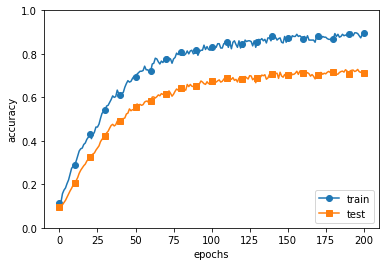

In [14]:
# coding: utf-8
import os
import sys

sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from mymodule.mnist import load_mnist
from mymodule.multi_layer_net import MultiLayerNet
from mymodule.optimizer import SGD

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
t_train = t_train[:300]

# weight decay（荷重減衰）の設定 =======================
#weight_decay_lambda = 0 # weight decayを使用しない場合
weight_decay_lambda = 0.1
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda)
optimizer = SGD(lr=0.01)

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break


# 3.グラフの描画==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

### Dropout

train loss:2.28368234873
=== epoch:1, train acc:0.0933333333333, test acc:0.101 ===
train loss:2.31850810155
train loss:2.31254165405
train loss:2.33296872044
=== epoch:2, train acc:0.0933333333333, test acc:0.1017 ===
train loss:2.33277745308
train loss:2.31812052509
train loss:2.32514075354
=== epoch:3, train acc:0.0966666666667, test acc:0.1023 ===
train loss:2.320677361
train loss:2.27700755058
train loss:2.32439101382
=== epoch:4, train acc:0.1, test acc:0.104 ===
train loss:2.30872786592
train loss:2.30181828091
train loss:2.29637571793
=== epoch:5, train acc:0.103333333333, test acc:0.1054 ===
train loss:2.31974422491
train loss:2.32768041232
train loss:2.31092842439
=== epoch:6, train acc:0.1, test acc:0.1049 ===
train loss:2.32046486055
train loss:2.31580303775
train loss:2.31240727465
=== epoch:7, train acc:0.103333333333, test acc:0.1061 ===
train loss:2.29587823721
train loss:2.32069683207
train loss:2.29659925621
=== epoch:8, train acc:0.103333333333, test acc:0.108 ===
tr

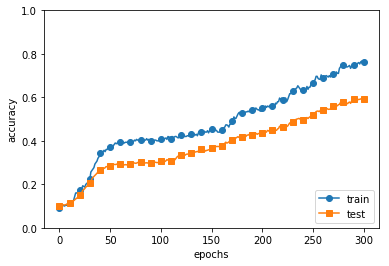

In [13]:
# coding: utf-8
import os
import sys
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from mymodule.mnist import load_mnist
from mymodule.multi_layer_net_extend import MultiLayerNetExtend
from mymodule.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
t_train = t_train[:300]

# Dropuoutの有無、割り合いの設定 ========================
use_dropout = True  # Dropoutなしのときの場合はFalseに
dropout_ratio = 0.2
# ====================================================

network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                              output_size=10, use_dropout=use_dropout, dropout_ration=dropout_ratio)
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=301, mini_batch_size=100,
                  optimizer='sgd', optimizer_param={'lr': 0.01}, verbose=True)
trainer.train()

train_acc_list, test_acc_list = trainer.train_acc_list, trainer.test_acc_list

# グラフの描画==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

### ハイパーパラメータの最適化

/Users/kot/miniconda2/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:21: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/kot/miniconda2/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:22: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/kot/miniconda2/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:23: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/kot/miniconda2/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:24: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


val acc:0.07 | lr:2.800125038523598e-05, weight decay:3.035828705811511e-06
val acc:0.18 | lr:5.644628427972933e-05, weight decay:7.12106028507742e-08
val acc:0.08 | lr:1.149267336728277e-06, weight decay:2.5663489254762258e-08
val acc:0.07 | lr:1.0094059271672956e-06, weight decay:4.469925934139922e-05
val acc:0.13 | lr:0.00011183737751532024, weight decay:5.87256469220694e-06
val acc:0.11 | lr:5.139726720992894e-05, weight decay:1.3032859843039969e-08
val acc:0.07 | lr:1.1412022483095946e-05, weight decay:1.4991203663152326e-06
val acc:0.12 | lr:1.078981803939573e-06, weight decay:2.59745176763737e-08
val acc:0.13 | lr:0.0002711122216017465, weight decay:9.595523733220336e-06
val acc:0.25 | lr:0.001455533161747985, weight decay:1.748041462511777e-07
val acc:0.31 | lr:0.0022254413043501418, weight decay:6.680522343403188e-06
val acc:0.04 | lr:1.4727326310004924e-05, weight decay:5.729135077514347e-05
val acc:0.07 | lr:4.7554344892209714e-05, weight decay:8.975976588913825e-05
val acc:

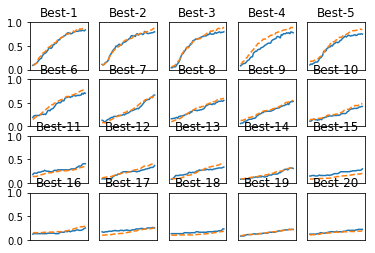

In [10]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from mymodule.mnist import load_mnist
from mymodule.multi_layer_net import MultiLayerNet
from mymodule.util import shuffle_dataset
from mymodule.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 高速化のため訓練データの削減
x_train = x_train[:500]
t_train = t_train[:500]

# 検証データの分離
validation_rate = 0.20
validation_num = x_train.shape[0] * validation_rate
x_train, t_train = shuffle_dataset(x_train, t_train)
x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[validation_num:]
t_train = t_train[validation_num:]


def __train(lr, weight_decay, epocs=50):
    network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                            output_size=10, weight_decay_lambda=weight_decay)
    trainer = Trainer(network, x_train, t_train, x_val, t_val,
                      epochs=epocs, mini_batch_size=100,
                      optimizer='sgd', optimizer_param={'lr': lr}, verbose=False)
    trainer.train()

    return trainer.test_acc_list, trainer.train_acc_list


# ハイパーパラメータのランダム探索======================================
optimization_trial = 100
results_val = {}
results_train = {}
for _ in range(optimization_trial):
    # 探索したハイパーパラメータの範囲を指定===============
    weight_decay = 10 ** np.random.uniform(-8, -4)
    lr = 10 ** np.random.uniform(-6, -2)
    # ================================================

    val_acc_list, train_acc_list = __train(lr, weight_decay)
    print("val acc:" + str(val_acc_list[-1]) + " | lr:" + str(lr) + ", weight decay:" + str(weight_decay))
    key = "lr:" + str(lr) + ", weight decay:" + str(weight_decay)
    results_val[key] = val_acc_list
    results_train[key] = train_acc_list

# グラフの描画========================================================
print("=========== Hyper-Parameter Optimization Result ===========")
graph_draw_num = 20
col_num = 5
row_num = int(np.ceil(graph_draw_num / col_num))
i = 0

for key, val_acc_list in sorted(results_val.items(), key=lambda x:x[1][-1], reverse=True):
    print("Best-" + str(i+1) + "(val acc:" + str(val_acc_list[-1]) + ") | " + key)

    plt.subplot(row_num, col_num, i+1)
    plt.title("Best-" + str(i+1))
    plt.ylim(0.0, 1.0)
    if i % 5: plt.yticks([])
    plt.xticks([])
    x = np.arange(len(val_acc_list))
    plt.plot(x, val_acc_list)
    plt.plot(x, results_train[key], "--")
    i += 1

    if i >= graph_draw_num:
        break

plt.show()

In [4]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
from mymodule.mnist import load_mnist
from mymodule.multi_layer_net_extend import MultiLayerNetExtend

# データの読み込み
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100], output_size=10,
                              use_batchnorm=True)

x_batch = x_train[:1]
t_batch = t_train[:1]

grad_backprop = network.gradient(x_batch, t_batch)
grad_numerical = network.numerical_gradient(x_batch, t_batch)


for key in grad_numerical.keys():
    diff = np.average( np.abs(grad_backprop[key] - grad_numerical[key]) )
    print(key + ":" + str(diff))

W1:0.0
b1:0.0
gamma1:0.0
beta1:0.0
W2:0.0
b2:0.0
gamma2:0.0
beta2:0.0519803470159
W3:0.0
b3:1.20126128489e-10
